In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gc
%matplotlib inline

## Load the dataset

In [103]:
train  = pd.read_csv('samples.csv',encoding='latin-1')
df = pd.DataFrame(train)

train = df.head(500)

pos =0
neg =0
for i in train['Sentiment']:
    if i == 0:
        neg +=1
    else:
        pos +=1

print("Number of poisitve reviews:",pos)
print("Number of negative reviews:",neg)


Number of poisitve reviews: 165
Number of negative reviews: 335


### Top 5 data from dataset

In [104]:
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


## Preprocessing

### 1. Function for removing words with a given pattern

In [4]:
#function for removing words with a given pattern
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt= re.sub(i,'',input_txt)
        
    return (input_txt)
    

### 2. removing usernames starting with @ 

In [5]:
#for removing all the usernames 
train2 = train 
tidy_tweet = []
for tweet in train2['SentimentText']:
    tweet = tweet.lower()
    tidy_tweet.append(remove_pattern(tweet,'@[\w]*'))
train2['tidy_tweet']= tidy_tweet

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 3. for removing punctuations, numbers, apostrophes

In [6]:
#for removing punctuations, numbers  
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4. Function for removing stop words & words with len <=2. Also tokenization.

In [7]:
stop_words = set(stopwords.words('english'))
def my_tokenizer(s):
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if len(t) > 2]
    return tokens

In [46]:
tokens = []
for sentence in train2['tidy_tweet']:
    tokens.append(my_tokenizer(sentence))

In [9]:
tokens

[['sad', 'apl', 'friend'],
 ['missed', 'new', 'moon', 'trailer'],
 ['omg', 'already'],
 ['omgaga',
  'sooo',
  'gunna',
  'cry',
  'dentist',
  'since',
  'suposed',
  'get',
  'crown',
  'put',
  'mins'],
 ['think', 'cheating'],
 ['worry', 'much'],
 ['juuuuuuuuuuuuuuuuussssst', 'chillin'],
 ['sunny', 'work', 'tomorrow', 'tonight'],
 ['handed', 'uniform', 'today', 'miss', 'already'],
 ['hmmmm', 'wonder', 'number'],
 ['must', 'think', 'positive'],
 ['thanks', 'haters', 'face', 'day'],
 ['weekend', 'sucked', 'far'],
 ['isnt', 'showing', 'australia'],
 ['thats', 'win'],
 ['way', 'feel', 'right'],
 ['awhhe',
  'man',
  'completely',
  'useless',
  'funny',
  'twitter',
  'http',
  'myloc'],
 ['feeling', 'strangely', 'fine', 'gon', 'listen', 'semisonic', 'celebrate'],
 ['huge', 'roll', 'thunder', 'scary'],
 ['cut',
  'beard',
  'growing',
  'well',
  'year',
  'gon',
  'start',
  'happy',
  'meantime'],
 ['sad', 'iran'],
 ['wompppp', 'wompp'],
 ['one', 'see', 'cause', 'one', 'else', 'follow

### 5. Function for reducing the length of the word by removing extra letters

In [10]:
#Fixing Word Length
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

### 6. Spelling Correction using SpellChecker()

In [11]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [12]:
from pattern.en import spelling

p1 = []
w1 = []
w2 = []
p2 = []
for sentence in tokens:
    for word in sentence:
        wordz = reduce_lengthening(word)
        #correct_word = spelling(wordz)
        if len(wordz)>1:
            w1.append(spell.correction(wordz))
        else:
            w1.append(word)
    p1.append(w1)
    w1 = []
p1


[['sad', 'apl', 'friend'],
 ['missed', 'new', 'moon', 'trailer'],
 ['omg', 'already'],
 ['omega',
  'soo',
  'gunn',
  'cry',
  'dentist',
  'since',
  'supposed',
  'get',
  'crown',
  'put',
  'mins'],
 ['think', 'cheating'],
 ['worry', 'much'],
 ['just', 'chilling'],
 ['sunny', 'work', 'tomorrow', 'tonight'],
 ['handed', 'uniform', 'today', 'miss', 'already'],
 ['hmm', 'wonder', 'number'],
 ['must', 'think', 'positive'],
 ['thanks', 'haters', 'face', 'day'],
 ['weekend', 'sucked', 'far'],
 ['int', 'showing', 'australia'],
 ['thats', 'win'],
 ['way', 'feel', 'right'],
 ['aware', 'man', 'completely', 'useless', 'funny', 'twitter', 'ttp', 'nylon'],
 ['feeling', 'strangely', 'fine', 'gon', 'listen', 'semiotic', 'celebrate'],
 ['huge', 'roll', 'thunder', 'scary'],
 ['cut',
  'beard',
  'growing',
  'well',
  'year',
  'gon',
  'start',
  'happy',
  'meantime'],
 ['sad', 'iran'],
 ['women', 'women'],
 ['one', 'see', 'cause', 'one', 'else', 'following', 'pretty', 'awesome'],
 ['sad',
  'le

### 7. POS Tagging

In [47]:
tagged_tokens = []
for token in p1:
    tagged_tokens.append(pos_tag(token))
    

### 8. Lemmatization

In [15]:
t1=[]
lemma=''
wordnet_lemmatizer = WordNetLemmatizer()
for tokens in tagged_tokens:
    for word, tag in tokens:
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma += word + ' '
        else:
            lemma += wordnet_lemmatizer.lemmatize(word,wntag)+ ' '
    t1.append(lemma)
    lemma=''

In [16]:
t1

['sad apl friend ',
 'miss new moon trailer ',
 'omg already ',
 'omega soo gunn cry dentist since suppose get crown put min ',
 'think cheat ',
 'worry much ',
 'just chill ',
 'sunny work tomorrow tonight ',
 'hand uniform today miss already ',
 'hmm wonder number ',
 'must think positive ',
 'thanks hater face day ',
 'weekend suck far ',
 'int show australia ',
 'thats win ',
 'way feel right ',
 'aware man completely useless funny twitter ttp nylon ',
 'feel strangely fine gon listen semiotic celebrate ',
 'huge roll thunder scary ',
 'cut beard grow well year gon start happy meantime ',
 'sad iran ',
 'woman woman ',
 'one see cause one else follow pretty awesome ',
 'sad level write massive blow tweet space comp shut lose lay fetal position ',
 'head hospital pull golf tourney place think rip something yeah ',
 'bore whats wrong please tell ',
 'bother wish could spend rest life sit go gig seriously ',
 'feel like shit right really want sleep noo hour dance art assignment finish

In [35]:
train2['tidy_tweet'] = t1
train2['tidy_tweet']

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0                                        sad apl friend 
1                                 miss new moon trailer 
2                                           omg already 
3      omega soo gunn cry dentist since suppose get c...
4                                           think cheat 
5                                            worry much 
6                                            just chill 
7                           sunny work tomorrow tonight 
8                       hand uniform today miss already 
9                                     hmm wonder number 
10                                  must think positive 
11                                thanks hater face day 
12                                     weekend suck far 
13                                   int show australia 
14                                            thats win 
15                                       way feel right 
16     aware man completely useless funny twitter ttp...
17     feel strangely fine gon 

### 9. Manual Correction

In [41]:
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("int","isn't")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("gon","go")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("soo","so")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("noo","no")

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

## Constructing Dictionary  

In [63]:
word_index_map ={}
current_index =0
words = []

t2 = train2['tidy_tweet']
for sentence in t2:
    words.append(sentence.split())


for sentence in words:
    for word in sentence:
        if word not in word_index_map:
            word_index_map[word] = current_index
            current_index +=1

In [64]:
len(word_index_map)

1402

# Visualization 

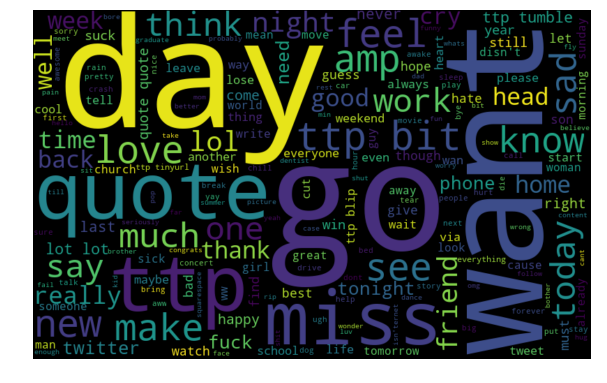

In [52]:
#Visualization
all_words = ' '.join([text for text in train2['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

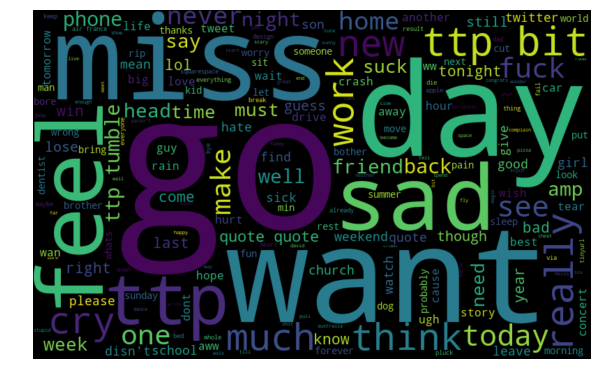

In [53]:
#negative words

negative_words = ' '.join([text for text in train2['tidy_tweet'][train2['Sentiment']==0]])
wordcloud = WordCloud(width=800, height=500).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

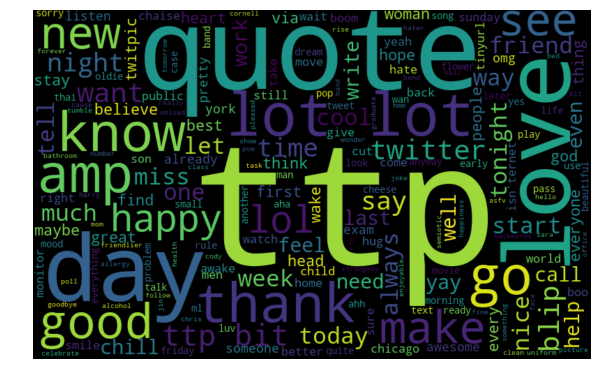

In [54]:
#positive words
positive_words = ' '.join([text for text in train2['tidy_tweet'][train2['Sentiment']==1]])
wordcloud = WordCloud(width=800, height=500).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Vectorization

In [66]:
def tokens_to_vectors(token, label):
    x = np.zeros(len(word_index_map) + 1)
    for t in token:
        i = word_index_map.get(t) #get the index of the word
        x[i]+=1  #get the corresponding frequency of the term 
    x = x/x.sum()    
    x[-1] = label
    return x

In [67]:
N = len(t1)
s = (N, len(word_index_map)+1)
from psutil import virtual_memory
mem = virtual_memory()
data=np.zeros(s,dtype=np.uint8)
i=0
for tt in train2['tidy_tweet'][train2['Sentiment']==1]:
    tokenize = tt.split()
    xy = tokens_to_vectors(tokenize,1)
    data[i,:] = xy
    i +=1

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [68]:
for tt in train2['tidy_tweet'][train2['Sentiment']==0]:
    tokenize = tt.split()
    xy = tokens_to_vectors(tokenize,0)
    data[i,:] = xy
    i+=1

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [70]:
data

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [95]:
np.random.shuffle(data)
X = data[:,:-1]
Y = data[:,-1]
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

In [96]:
df = pd.DataFrame(data)
l= []
l= word_index_map.keys()
l1 = []
for i in l:
    l1.append(i)
l1.append('label')
df.columns = l1
print(df.head())
df.to_csv('twitter_pp.csv')

   sad  apl  friend  miss  new  moon  trailer  omg  already  omega  ...  \
0    0    0       0     0    0     0        0    0        0      0  ...   
1    0    0       0     0    0     0        0    0        0      0  ...   
2    0    0       0     0    0     0        0    0        0      0  ...   
3    0    0       0     0    0     0        0    0        0      0  ...   
4    0    0       0     0    0     0        0    0        0      0  ...   

   ghostbusters  region  free  copy  britain  difference  believing  ove  wit  \
0             0       0     0     0        0           0          0    0    0   
1             0       0     0     0        0           0          0    0    0   
2             0       0     0     0        0           0          0    0    0   
3             0       0     0     0        0           0          0    0    0   
4             0       0     0     0        0           0          0    0    0   

   label  
0      0  
1      0  
2      1  
3      0  
4      

# Implementing Models

## 1. Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
model.score(Xtest, Ytest)

0.7

In [100]:
model.score(Xtrain, Ytrain)

0.6625

## 2. Naive Bayes

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
print("Accuracy for testing dataset:",model.score(Xtest,Ytest))
print("Accuracy for training dataset:",model.score(Xtrain,Ytrain))

Accuracy for testing dataset: 0.7
Accuracy for training dataset: 0.6875
